In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.utils.readoutnc

In [3]:
import glob

In [4]:
fns = glob.glob('/data/readout/2015-11-26_*modulated.nc')
fns.sort()
fns

['/data/readout/2015-11-26_212641_scan_lo_1050.0_MHz_source_modulated.nc',
 '/data/readout/2015-11-26_213149_scan_lo_1178.0_MHz_source_modulated.nc',
 '/data/readout/2015-11-26_213657_scan_lo_1306.0_MHz_source_modulated.nc',
 '/data/readout/2015-11-26_214207_scan_lo_1434.0_MHz_source_modulated.nc',
 '/data/readout/2015-11-26_214710_scan_lo_1562.0_MHz_source_modulated.nc',
 '/data/readout/2015-11-26_215217_scan_lo_1690.0_MHz_source_modulated.nc',
 '/data/readout/2015-11-26_215723_scan_lo_1818.0_MHz_source_modulated.nc']

In [5]:
freqs = []
data = []
for fn in fns[:2]:
    print fn
    rnc = kid_readout.utils.readoutnc.ReadoutNetCDF(fn)
    d = rnc.sweeps[0].timestream_group.data[:]
    swp = rnc.sweeps[0]
    d = d.reshape((d.shape[0],-1,256)).mean(1)
    d = d*np.exp(-2j*np.pi*swp.frequency*31.3)[:,None]
    fr = rnc.sweeps[0].frequency
    ddc = d[:,32:96].mean(1)-d[:,140:204].mean(1)
    freqs.append(fr)
    data.append(ddc)
    rnc.close()

/data/readout/2015-11-26_212641_scan_lo_1050.0_MHz_source_modulated.nc
/data/readout/2015-11-26_213149_scan_lo_1178.0_MHz_source_modulated.nc


In [6]:
def smooth(x,factor=16):
    return np.convolve(x,np.ones((factor,))/(1.0*factor),mode='valid')

In [3]:
responsive_resonances = np.array([
        1126.62, #probably unusable
    1138.62,
        1144.57,
        1149.3,
        1151.6,
        1156.4,
        1162.7,
        1169.7,
        1172.8,
        1178.4,
        1184.5,
        1193.8,
        1195.0,
        1203.6,
        1208.2,
        1246.2,
        1248.25, #barely there
        1258.81, 
        1262.7,
        1265.2, #very shallow
        1272.3, #start of ~4 resonator complex
        1273.2,
        1274.2,
        1274.8,
        1291.75,#
#        1292.7,
        1293.8,
        1301.8,#
        1302.9,
        1314.4,
        1315.7,#
        1320.3,
        1324.3,
#        1330.9,
#        1334.6,
#        1343.5,
#        1352.4,
        
])

In [4]:
responsive_resonances.shape

(32,)

In [5]:
responsive_resonances.mean()

1230.5131249999999

In [21]:
np.save('/data/readout/resonances/2015-11-26-jpl-nevins-responsive-resonances.npy',responsive_resonances)

In [23]:
responsive_resonances.ptp()

197.68000000000006

(1100, 1330)

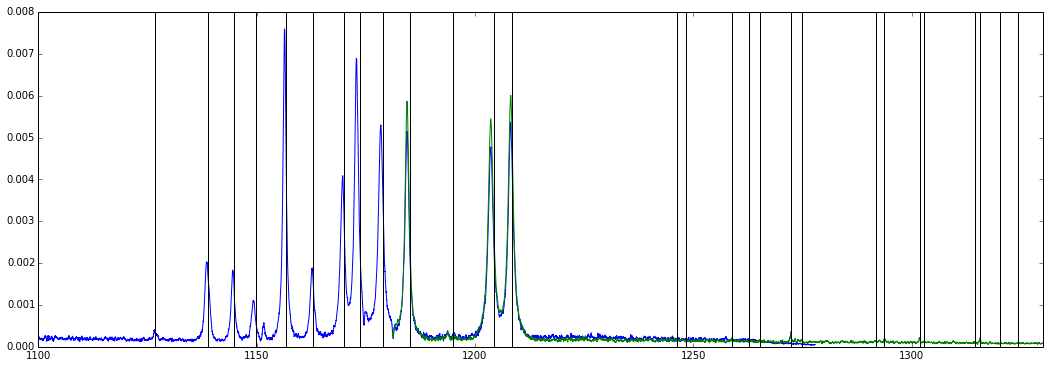

In [15]:
figure(figsize=(18,6))
for fr,ddc in zip(freqs,data):
    plot(smooth(fr),smooth(np.abs(ddc)))
for res in resonances:
    gca().axvline(res,color='k')
xlim(1100,1330)
#yscale('log')
#xlim(1900,2050)
#ylim(0,1e-3)

In [16]:
np.savez('/data/readout/archive/2015-11-26-jpl-nevins-mmw-response-vectors.npz',freqs=np.concatenate(freqs),data=np.concatenate(data))

In [11]:
rnc = kid_readout.utils.readoutnc.ReadoutNetCDF('/data/readout/2015-11-26_215723_scan_lo_1818.0_MHz_source_modulated.nc')

In [12]:
swp  = rnc.sweeps[0]

In [13]:
d = swp.timestream_group.data[:]

In [14]:
d = d.reshape((d.shape[0],-1,256)).mean(1)

In [15]:
(np.abs(d).ptp(1)>.01).sum()

11

In [16]:
dc = d*np.exp(-2j*np.pi*swp.frequency*31.3)[:,None]

In [17]:
fr = swp.frequency

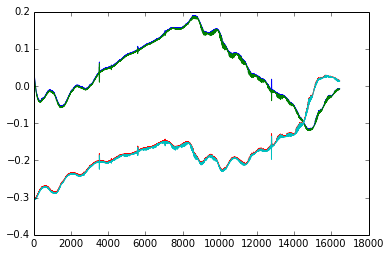

In [18]:
plot(dc.real.max(1))
plot(dc.real.min(1))
plot(dc.imag.max(1))
plot(dc.imag.min(1))


(10000, 12000)

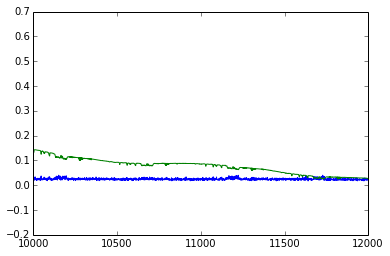

In [20]:
plot(np.abs(dc).ptp(1)*10)
plot(dc.real.max(1))
xlim(10000,12000)

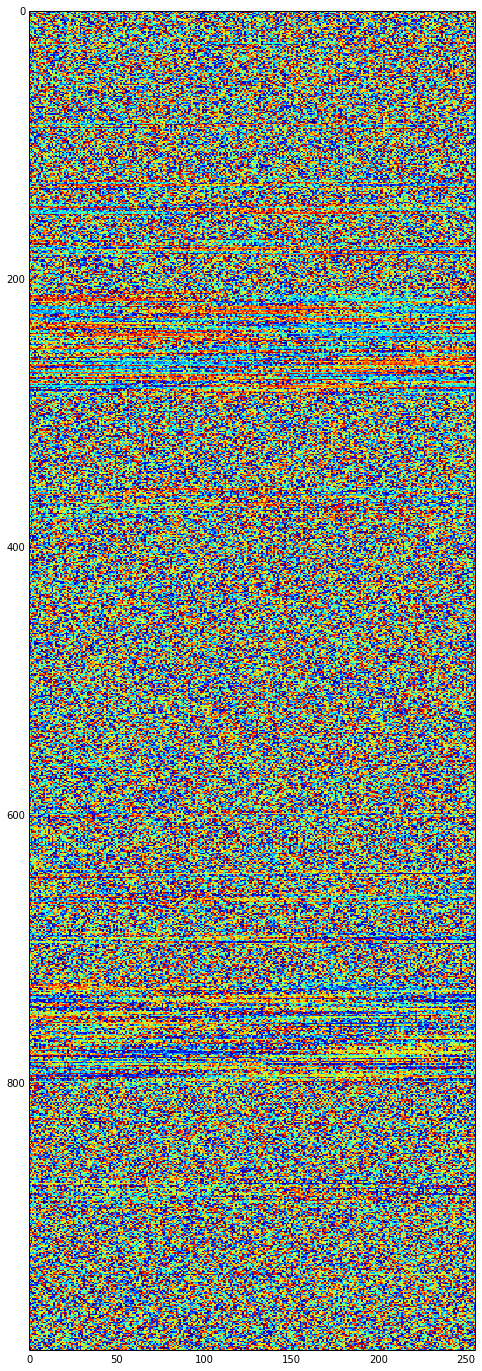

In [23]:
figure(figsize=(8,24))
imshow(np.angle(dc[13000:14000,:]-dc[13000:14000,:].mean(1)[:,None]),aspect='auto',interpolation='nearest')

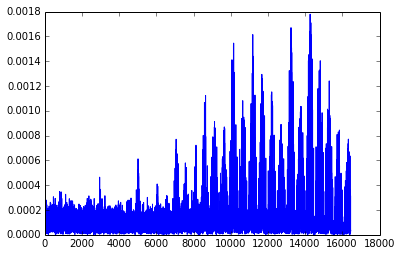

In [22]:
plot(np.abs(ddc))